## Get lists from the txt storing parses from ChatGPT

In [1]:
from ast import literal_eval

def read_file_lines(text_file):
    """
        reads the text_file
        returns a list of uncommented lines
    """
    lists = []
    with open(text_file, 'r') as f:
        for line in f:
            line = line.strip()
            if line.startswith('#'):
                continue  # comment
            lists.append(literal_eval(line))
    return lists

## Convert lists into nltk trees

In [2]:
from nltk.tree import Tree

def get_tree(current_list):
    label = current_list[0]
    subtree_list = []
    
    if len(current_list)>1 and type(current_list[1]) is str:
        return Tree(label, [current_list[1]])        
    
    for i in range(1, len(current_list)):
        subtree_list.append(get_tree(current_list[i]))
    
    return Tree(label, subtree_list)

In [3]:
def parse_txt(file):
    sent_lists = read_file_lines(file)
    
    tree_list = []
    
    for sentence in sent_lists:
        tree_list.append(get_tree(sentence))
    
    return tree_list

### ungrammatical

In [10]:
ungrammatical_trees_GPT = parse_txt("D:\\MIT\\Courses\\2023-Spring\\6.8630-NLP\\Final Project\\LLM CGW\\ChatGPT\\ungrammatical-set-parses.txt")

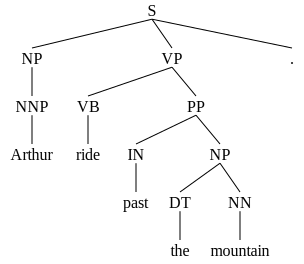

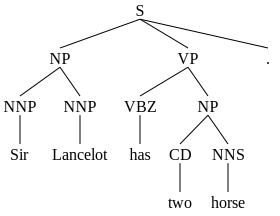

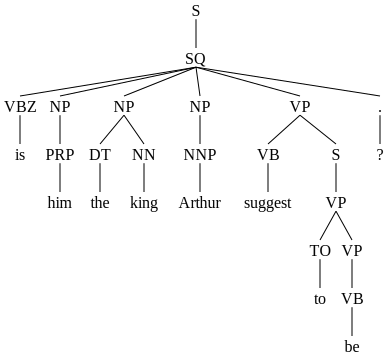

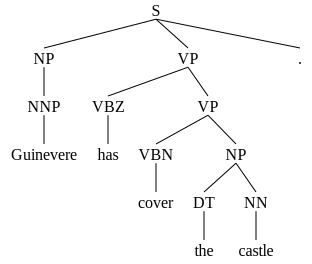

In [11]:
for tree in ungrammatical_trees_GPT:
    display(tree)